In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#this sets the theme of the plots to seaborn which makes them look nicer
sns.set_theme()
plt.rcParams["figure.figsize"] = (20, 10)
#this adjusts the default size of plots to make them larger

In [5]:
def virus_sim(f_x_dim, f_y_dim, f_pop, f_infection_radius, f_infection_chance, 
              f_mortaility_rate, f_cure_step, f_time_steps):
  
    from numpy.random import RandomState
    np.random.seed(42)

      #number of people in the box
    pop_total = f_pop

      #setting up the array which contains the x and y coordinate for each person
    people = np.zeros((pop_total, 6))

    x_dim = f_x_dim
    y_dim = f_y_dim

      #create a uniform random x and y coordinate for each person 
    for i in range(pop_total):
        people[i,0] = np.random.uniform(0, x_dim)
        people[i,1] = np.random.uniform(0, y_dim)

      #the infection radius of each infected person 
    infection_radius = f_infection_radius
      #the infection chance if a uninfected person is within the infection radius of another infected person
    infection_chance = f_infection_chance
      #chance of dying per time step if person is infected
    mortaility_rate = f_mortaility_rate
      #cure time step
    cure_step = f_cure_step
      #number of time steps to run the simulation for
    time_steps = f_time_steps


      #infected_inital = np.random.random_integers(0, pop_total)
    people[:, 2] = 0
    people[:, 3] = 0  
    people[:, 4] = 0
    people[:, 5] = 0

      #this assigns which person is going to be the first infected person (paitent zero)
    infected_inital = 10
      #this changes the infection status to paitent zero to 1 (infected)
    people[infected_inital, 2] = 1

      #creates the list of infected people for plotting 
    infected_people = []
      #adds paitent zero to the infected people list as they are the first infected person

    deceased_people = []

    cured_people = []

      #this is another list that sums up the number of infected people after each time step
    infected_over_time = []
      #this is another list that sums up the number of non-infected people after each time step
    non_infected_over_time = []
      #this is another list that sums up the number of deceased people after each time step
    deceased_over_time = []

    cured_over_time = []

      #this adds the first value to the number of infected people over time which is 0
    infected_over_time.append(0)
    non_infected_over_time.append(pop_total-1)
    deceased_over_time.append(0)

    cured_over_time.append(0)


    print('Paramaters used:')
    print('x_dimension: ', x_dim) 
    print('y_dimension:', y_dim)
    print('Population: ', pop_total)
    print('Infection radius: ', infection_radius)
    print('Infection chance: ', infection_chance)
    print('Mortality rate: ', mortaility_rate)
    print('Cure steps: ', cure_step)
    print('Time steps:', time_steps)
    print('----------------------------------')
    print('----------------------------------')

      #initally loop over the time steps
    for i in range(time_steps):

        #inilitzie the infected count back to zero after every time step 
        infected_count = 0
        deceased_count = 0
        non_infected_count = 0
        cured_count = 0

        #loop over the entire population
        for j in range(pop_total):

          #finds the which people within the population are infected by finding their infection status
            if people[j, 2] == 1:


                if i - people[j, 4] == cure_step:

                    people[j, 2] = 0

                    people[j, 5] = 1

                    infected_count = infected_count - 1

                    cured_count = cured_count + 1

                elif np.random.uniform(0,1) < mortaility_rate and people[j, 3] == 0:

                    people[j, 3] = 1

                    people[j, 2] = 0

                    infected_count = infected_count - 1

                    deceased_count = deceased_count + 1

            #then it loops over the entire population for each infection person to see if anyone is within the infection radius of that specific infected person
                for k in range(pop_total):

            #this is the main logic which decides if a person becomes infected by another infected person by finding if they are within range and using the infection chance
                    if np.sqrt((people[k, 0] - people[j, 0])**2 + (people[k, 1] - people[j, 1])**2) < infection_radius and np.random.uniform(0,1) < infection_chance and people[k, 2] == 0 and people[k, 3] == 0 and people[k, 5] == 0:


                #if this condition is met the person becomes infected
                        people[k, 2] = 1

                #the infected count goes up by 1
                        infected_count = infected_count + 1

                        non_infected_count = non_infected_count - 1

                        people[k, 4] = i 


        #the infected over time list uses the count and the previous value to keep a running sum of the people that are infected
        infected_over_time.append(infected_count + infected_over_time[i])

        deceased_over_time.append(deceased_count + deceased_over_time[i])

        non_infected_over_time.append(non_infected_count + non_infected_over_time[i])

        cured_over_time.append(cured_count + cured_over_time[i])


    for i in range(people.shape[0]):
        if people[i, 2] == 1:
            infected_people.append((people[i, 0], people[i, 1]))

        if people[i, 3] == 1:
            deceased_people.append((people[i, 0], people[i, 1]))

        if people[i, 5] == 1:
            cured_people.append((people[i, 0], people[i, 1]))



      #creates two empty plots 
    fig, ax = plt.subplots(3)

      #this creates a scatter plot for the first suplot of all the non infected people
    ax[0].scatter(people[:, 0], people[:, 1], label = 'Not infected')
      #this creates another scatter ontop of the first one showing all the infected people which loops over the infected_people list
    ax[0].scatter([x[0] for x in infected_people], [x[1] for x in infected_people], c='r', label = 'Infected')
    ax[0].scatter([x[0] for x in deceased_people], [x[1] for x in deceased_people], c='k', label = 'Deceased')
    ax[0].scatter([x[0] for x in cured_people], [x[1] for x in cured_people], c='g', label = 'Cured')
      #this creates another scatter plot of one person who was paitent zero 
    ax[0].scatter(people[infected_inital, 0], people[infected_inital, 1], c = 'darkorange', label='Paitent zero')
      #this allows the title of the plot to change depending on how many time steps were taken
    ax[0].set_title('Infection map after {} time steps'.format(time_steps), size = 15)
      #this adds a legend to the first scatter plot
    ax[0].legend()

      #this creates a filled line plot of infected people over time
    ax[1].fill_between(range(0, time_steps+1), 0, non_infected_over_time, facecolor = 'b', label = 'Not infected')
    ax[1].fill_between(range(0, time_steps+1), non_infected_over_time, np.array(non_infected_over_time) + np.array(infected_over_time), facecolor = 'r', label = 'Infected')
    ax[1].fill_between(range(0, time_steps+1), np.array(non_infected_over_time) + np.array(infected_over_time), np.array(deceased_over_time) +
                       np.array(non_infected_over_time) + np.array(infected_over_time), facecolor = 'k', label = 'Deceased')

    ax[1].fill_between(range(0, time_steps+1), np.array(deceased_over_time) + np.array(non_infected_over_time) + np.array(infected_over_time), 
                       np.array(deceased_over_time) + np.array(non_infected_over_time) + np.array(infected_over_time) + np.array(cured_over_time), facecolor = 'g', label = 'Cured')

    ax[1].set_ylabel('Total number infected')
    ax[1].set_xlabel('Time steps')
    ax[1].legend()

    non_sum_infected_over_time = np.diff(infected_over_time, n = 1)

    ax[2].plot(range(time_steps), non_sum_infected_over_time, c='r')
    ax[2].set_ylabel('Number of people infected per time step')
    ax[2].set_xlabel('Time steps')

    plt.tight_layout()

    print('Number of non-infected people: ', int(np.array(non_infected_over_time)[-1:]))
    print('Number of infected people: ', len([x[1] for x in infected_people]))
    print('Number of deceased people: ', len([x[1] for x in deceased_people]))
    print('Number of cured people: ', len([x[1] for x in cured_people]))

Paramaters used:
x_dimension:  1
y_dimension: 1
Population:  1000
Infection radius:  0.07
Infection chance:  0.2
Mortality rate:  0.02
Cure steps:  5
Time steps: 20
----------------------------------
----------------------------------
Number of non-infected people:  1
Number of infected people:  0
Number of deceased people:  82
Number of cured people:  917


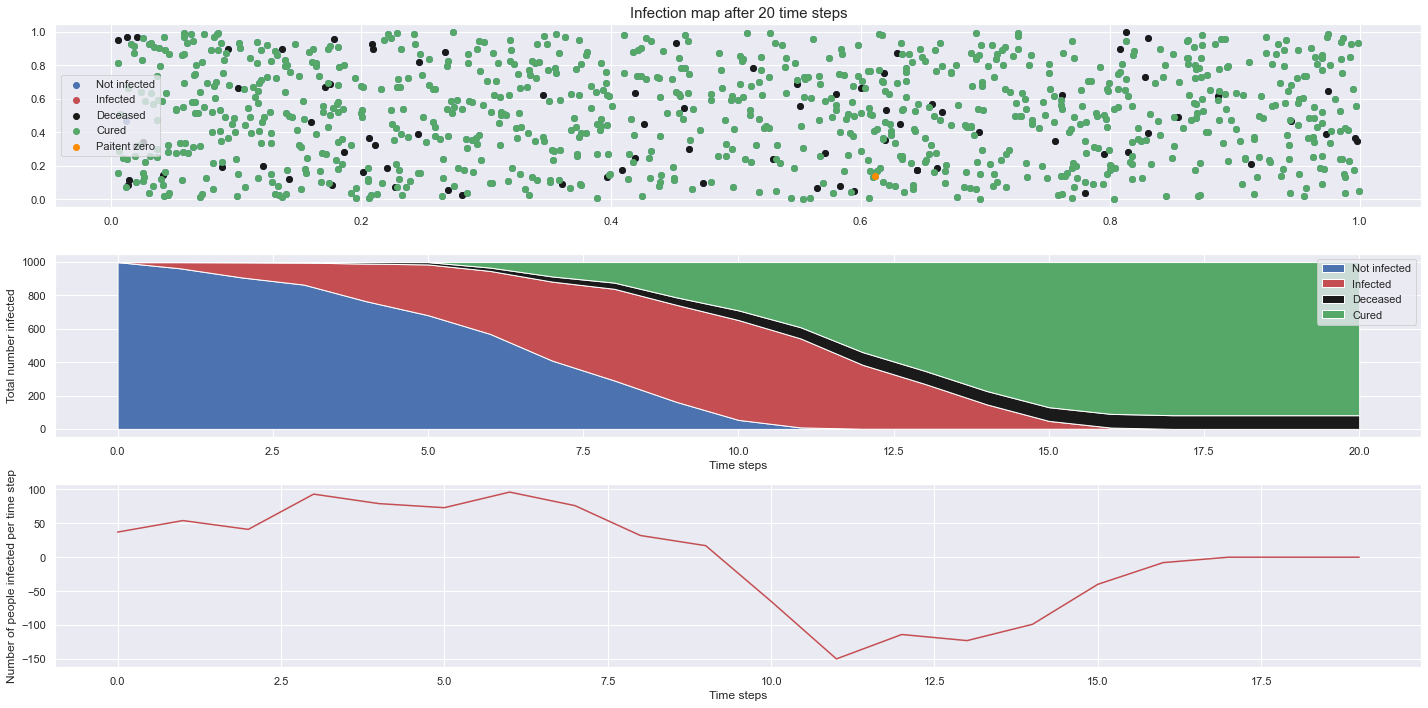

In [8]:
 virus_sim(1, 1, 1000, 0.07, 0.2, 0.02, 5, 20)
#similar probability of death to Covid-19

Paramaters used:
x_dimension:  1
y_dimension: 1
Population:  1000
Infection radius:  0.07
Infection chance:  0.2
Mortality rate:  0.1
Cure steps:  5
Time steps: 10
----------------------------------
----------------------------------
Number of non-infected people:  90
Number of infected people:  469
Number of deceased people:  246
Number of cured people:  195


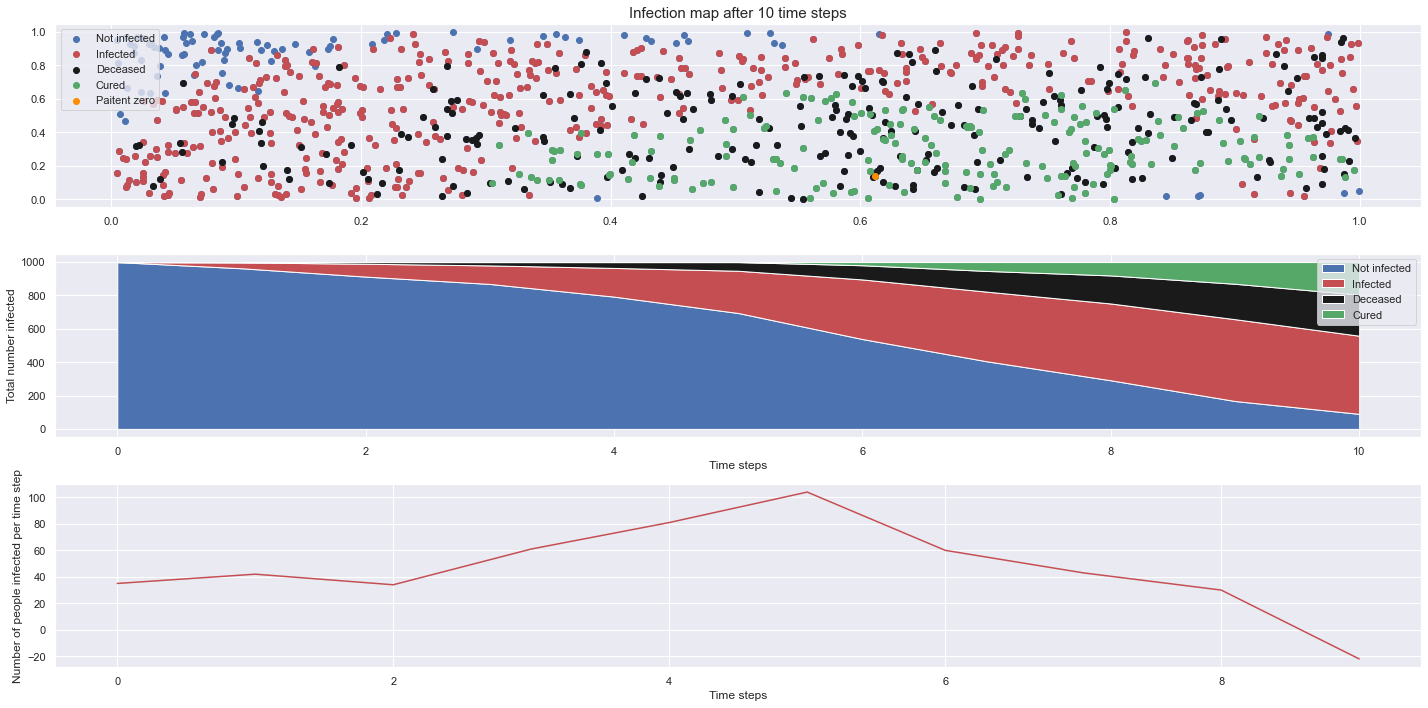

In [9]:
virus_sim(1, 1, 1000, 0.07, 0.2, 0.1, 5, 10)
#similar death rate to SARS

Paramaters used:
x_dimension:  1
y_dimension: 1
Population:  1000
Infection radius:  0.07
Infection chance:  0.2
Mortality rate:  0.5
Cure steps:  5
Time steps: 17
----------------------------------
----------------------------------
Number of non-infected people:  12
Number of infected people:  0
Number of deceased people:  936
Number of cured people:  52


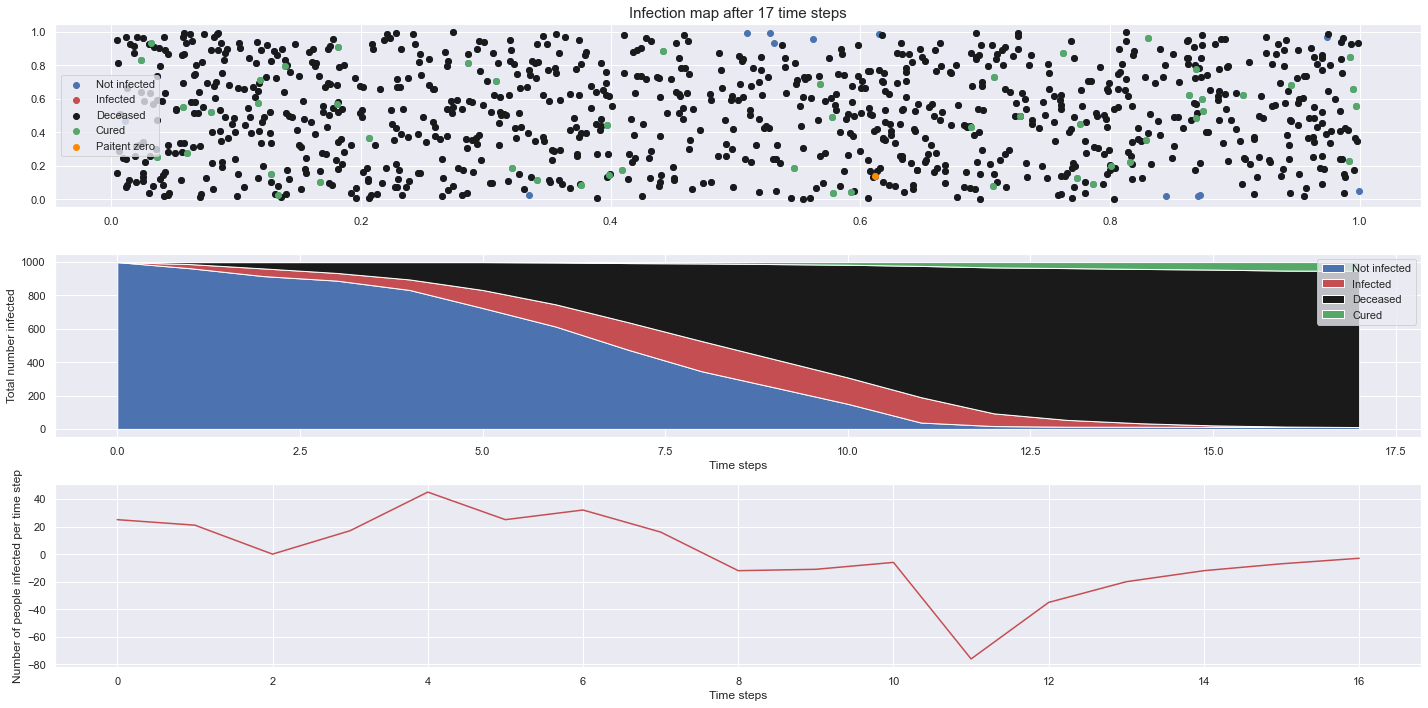

In [10]:
virus_sim(1, 1, 1000, 0.07, 0.2, 0.5, 5, 17)
#similar probability of death to the pneumonic plague or 'Black Death'

Paramaters used:
x_dimension:  1
y_dimension: 1
Population:  1000
Infection radius:  0.07
Infection chance:  0.2
Mortality rate:  0.1
Cure steps:  2
Time steps: 20
----------------------------------
----------------------------------
Number of non-infected people:  10
Number of infected people:  0
Number of deceased people:  143
Number of cured people:  847


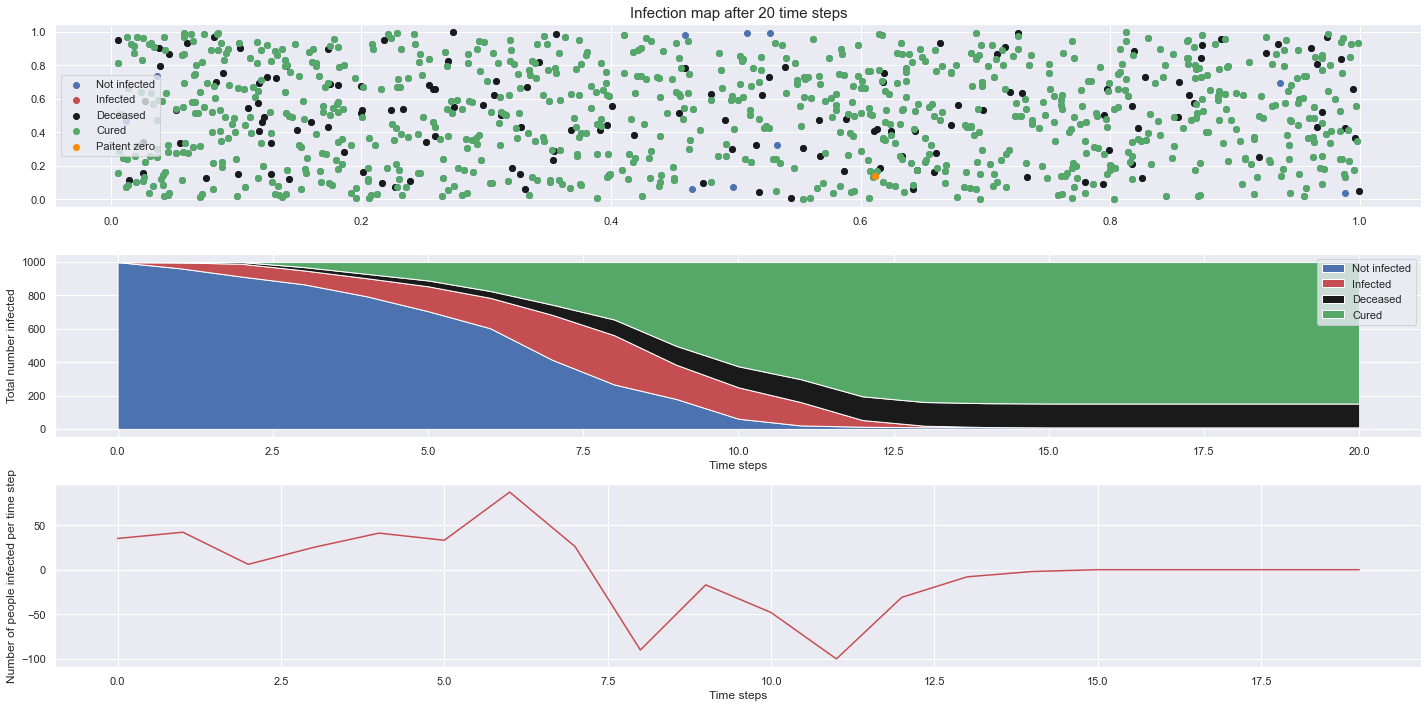

In [11]:
virus_sim(1, 1, 1000, 0.07, 0.2, 0.1, 2, 20)

Paramaters used:
x_dimension:  1
y_dimension: 1
Population:  1000
Infection radius:  0.07
Infection chance:  0.2
Mortality rate:  0.1
Cure steps:  5
Time steps: 20
----------------------------------
----------------------------------
Number of non-infected people:  3
Number of infected people:  0
Number of deceased people:  379
Number of cured people:  618


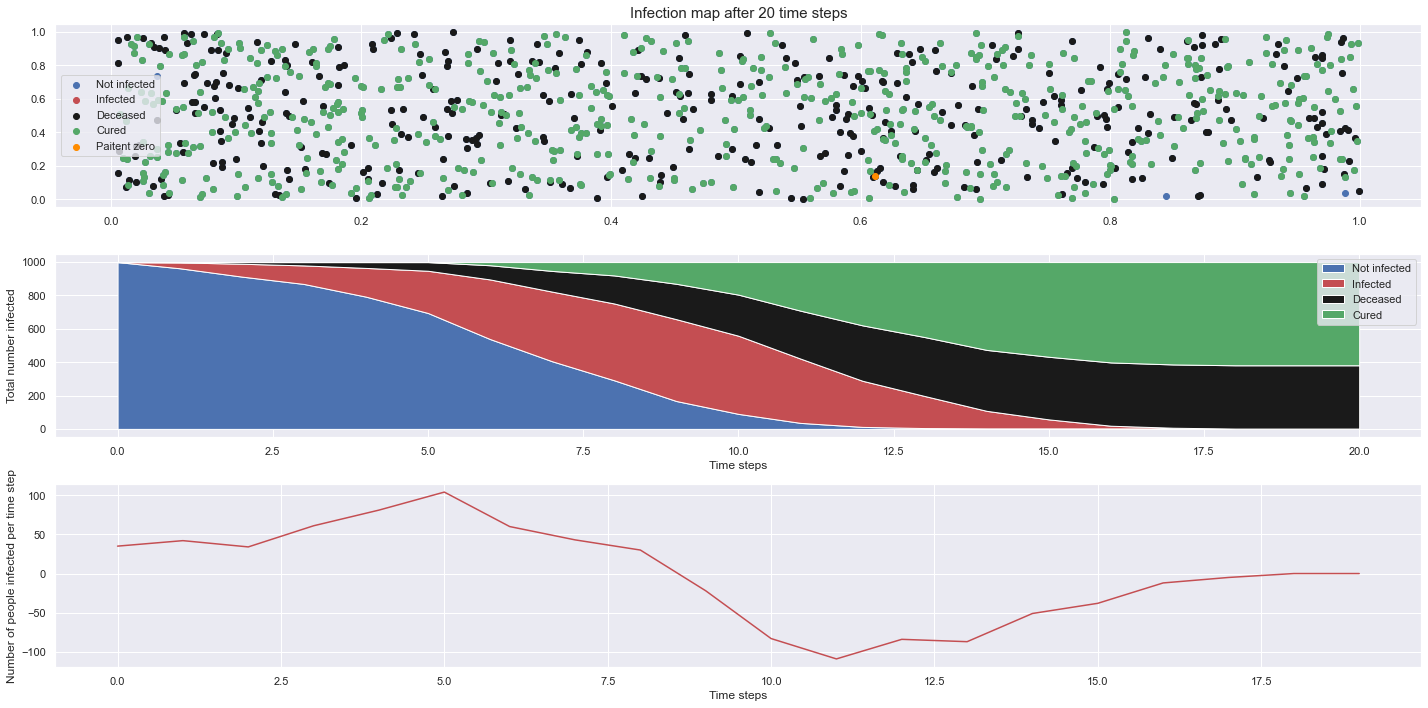

In [12]:
virus_sim(1, 1, 1000, 0.07, 0.2, 0.1, 5, 20)

Paramaters used:
x_dimension:  1
y_dimension: 1
Population:  1000
Infection radius:  0.07
Infection chance:  0.2
Mortality rate:  0.1
Cure steps:  10
Time steps: 25
----------------------------------
----------------------------------
Number of non-infected people:  0
Number of infected people:  0
Number of deceased people:  623
Number of cured people:  377


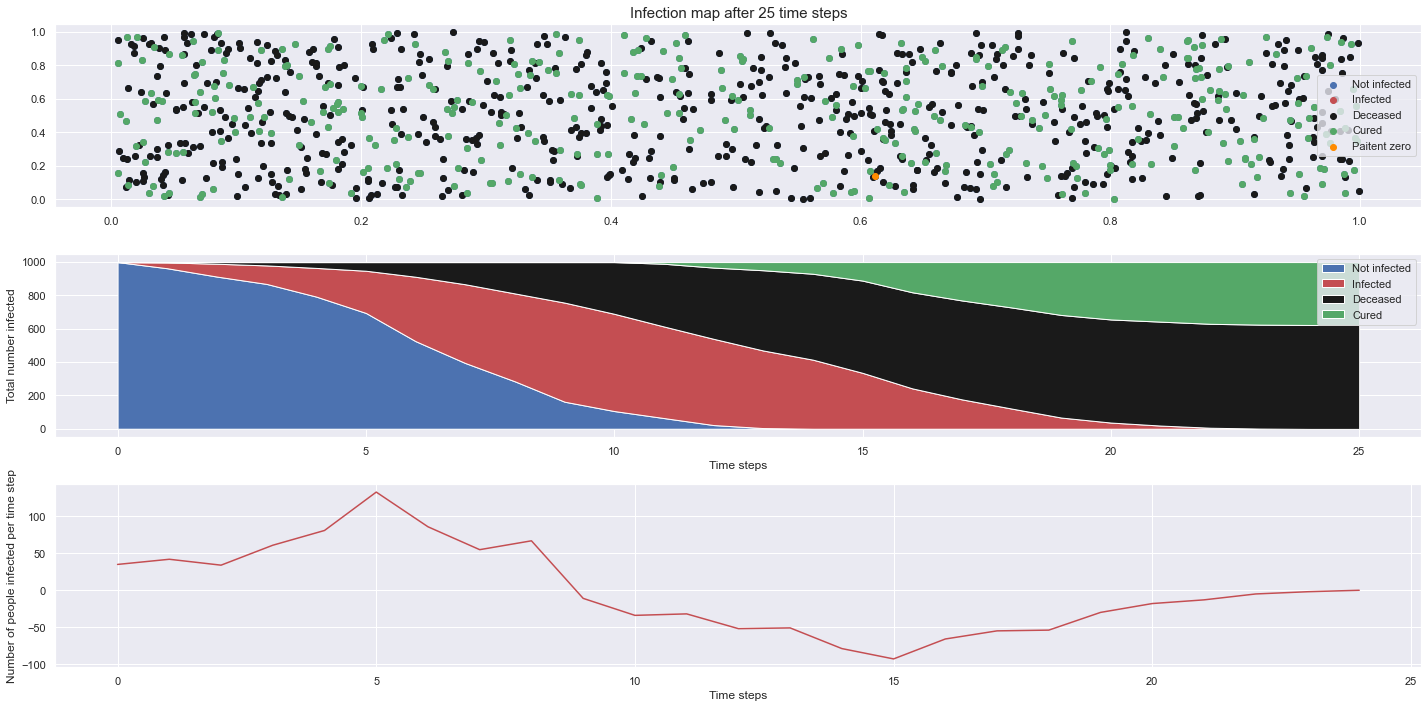

In [13]:
virus_sim(1, 1, 1000, 0.07, 0.2, 0.1, 10, 25)